In [7]:
#Importing required packages
#import numpy as np #to work with matrices
#import matplotlib.pyplot as plt #to make plots
import polars as pl #to work with data
import networkx as nx #to work with networks
import matplotlib.pyplot as plt
from springrank import SpringRank
import rank_swirl 

ModuleNotFoundError: No module named 'rank_swirl'

In [ ]:
df = pl.read_csv("C:/Users/sophi/Documents/BIOL-4559-HW/aggXquarter.txt", separator = "\t")
G = nx.from_pandas_edgelist(df, 
                            source = "actor", 
                            target = "target", 
                            edge_attr = 'number.wins') #make a graph 
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, edge_color='gray', alpha=0.6)
plt.title("Entire Parakeet Aggression Network")
plt.show()

In [3]:
df_q1 = df.filter(pl.col("study.quarter")==1)
df_q2 = df.filter(pl.col("study.quarter") ==2)
df_q3 = df.filter(pl.col("study.quarter") == 3)
df_q4 = df.filter(pl.col("study.quarter") == 4)
G1 = nx.from_pandas_edgelist(df_q1, 
                            source = "actor", 
                            target = "target", 
                            edge_attr = 'number.wins')
G2 = nx.from_pandas_edgelist(df_q2, 
                            source = "actor", 
                            target = "target", 
                            edge_attr = 'number.wins')
G3 = nx.from_pandas_edgelist(df_q3, 
                            source = "actor", 
                            target = "target", 
                            edge_attr = 'number.wins')
G4 = nx.from_pandas_edgelist(df_q4, 
                            source = "actor", 
                            target = "target", 
                            edge_attr = 'number.wins')
print(df_q1.head(4))
print(df_q2.head(4))
print(df_q3.head(4))
print(df_q4.head(4))

shape: (4, 5)
┌───────┬───────────────┬───────┬────────┬─────────────┐
│ group ┆ study.quarter ┆ actor ┆ target ┆ number.wins │
│ ---   ┆ ---           ┆ ---   ┆ ---    ┆ ---         │
│ str   ┆ i64           ┆ str   ┆ str    ┆ i64         │
╞═══════╪═══════════════╪═══════╪════════╪═════════════╡
│ G1    ┆ 1             ┆ bbb   ┆ rgn    ┆ 1           │
│ G1    ┆ 1             ┆ bgn   ┆ bng    ┆ 2           │
│ G1    ┆ 1             ┆ bgn   ┆ ggg    ┆ 4           │
│ G1    ┆ 1             ┆ bgn   ┆ grr    ┆ 1           │
└───────┴───────────────┴───────┴────────┴─────────────┘
shape: (4, 5)
┌───────┬───────────────┬───────┬────────┬─────────────┐
│ group ┆ study.quarter ┆ actor ┆ target ┆ number.wins │
│ ---   ┆ ---           ┆ ---   ┆ ---    ┆ ---         │
│ str   ┆ i64           ┆ str   ┆ str    ┆ i64         │
╞═══════╪═══════════════╪═══════╪════════╪═════════════╡
│ G1    ┆ 2             ┆ bbb   ┆ ggg    ┆ 1           │
│ G1    ┆ 2             ┆ bbb   ┆ grb    ┆ 2           │
│ G

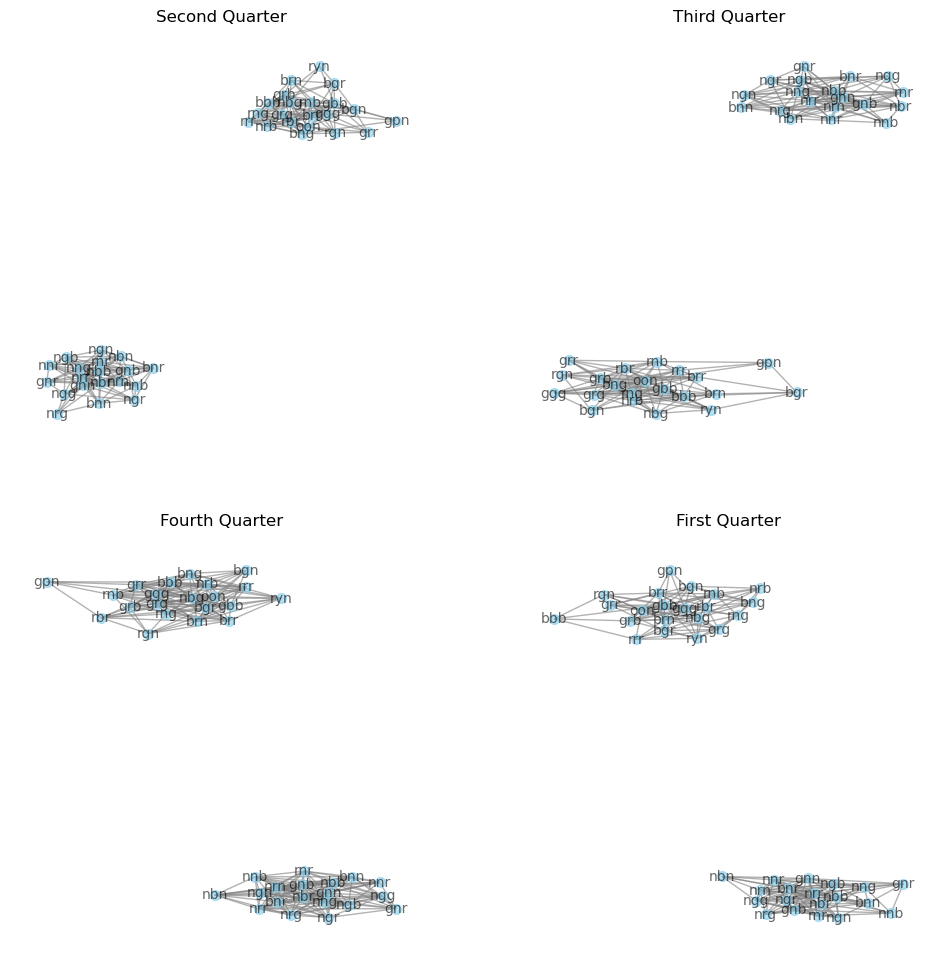

In [73]:
#set up a figure we can put each quarter's network on to compare
fig, ax = plt.subplots(2,2, figsize = (12,12))
#draw first quarter graph
nx.draw(G1, with_labels=True, node_size=50, node_color='skyblue', font_size=10, edge_color='gray', alpha=0.6)
plt.title("First Quarter")
plt.subplot(2,2,1)
#draw second quarter graph
nx.draw(G2, with_labels=True, node_size=50, node_color='skyblue', font_size=10, edge_color='gray', alpha=0.6)
plt.title("Second Quarter")
plt.subplot(2,2,2)
#draw third quarter graph
nx.draw(G3, with_labels=True, node_size=50, node_color='skyblue', font_size=10, edge_color='gray', alpha=0.6)
plt.title("Third Quarter")
plt.subplot(2,2,3)
#draw fourth quarter graph
nx.draw(G4, with_labels=True, node_size=50, node_color='skyblue', font_size=10, edge_color='gray', alpha=0.6)
plt.title("Fourth Quarter")
plt.subplot(2,2,4)
#show the plot with all four quarters
plt.show()

In [18]:
def to_adj(G: nx.Graph): #define a function that takes G, a networkx graph as an argument and our node dictionary
    n = len(G.nodes) #figure out how many nodes are in this network to decide the size of the matrix
    adj_matrix = np.zeros((n,n)) #make the empty matrix / array to be the dimensions we need
    for i, j in G.edges: # go through each pair in the edge list
        adj_matrix[d[i],d[j]] = 1 #and add a 1 if there is an edge between those nodes in the ith column and jth row
        adj_matrix[d[j],d[i]] = 1 #and in the jth column and ith row
    return adj_matrix #return the matrix 
A1 = to_adj(G1, G1.edges) #call our function
A2 = to_adj(G2)
print(A1)
print(A2)

TypeError: to_adj() takes 1 positional argument but 2 were given

In [14]:
#create adjacency matrix?
nodedict = {node: i for i, node in enumerate(G.nodes)} #create a dictionary with the nodes that you have
reverse_nodedict = {i: node for i, node in enumerate(G.nodes)} #make it so that you can find the key for that node
adj_mat = nx.to_numpy_array(G, nodelist=nodedict.keys(), dtype=int) #make an adjacency matrix for your network
print(nodedict)
for edge in G1.edges():
    print(edge)
    #edge[0] > [1]

 
#for edge in G1.edges(): #iterate over each edge  
    #if edge[0] > edge[1]: #first edge is higher ranked than second edge
        #first edge is higher ranked than second edge
    #which means we'll have to go looking in some sort of node dictionary


{'bbb': 0, 'rgn': 1, 'bgn': 2, 'bng': 3, 'ggg': 4, 'grr': 5, 'nrb': 6, 'oon': 7, 'rnb': 8, 'bgr': 9, 'brr': 10, 'grg': 11, 'rng': 12, 'brn': 13, 'gbb': 14, 'grb': 15, 'nbg': 16, 'rrr': 17, 'gpn': 18, 'rbr': 19, 'ryn': 20, 'bnn': 21, 'nrg': 22, 'bnr': 23, 'nbn': 24, 'nng': 25, 'nnr': 26, 'gnb': 27, 'gnn': 28, 'nbb': 29, 'ngb': 30, 'ngg': 31, 'ngn': 32, 'ngr': 33, 'nnb': 34, 'nrn': 35, 'nrr': 36, 'rnr': 37, 'gnr': 38, 'nbr': 39}
('bbb', 'rgn')
('bbb', 'gbb')
('bbb', 'grb')
('bbb', 'rrr')
('rgn', 'brn')
('rgn', 'brr')
('rgn', 'gbb')
('rgn', 'oon')
('rgn', 'rng')
('bgn', 'bng')
('bgn', 'ggg')
('bgn', 'grr')
('bgn', 'nrb')
('bgn', 'oon')
('bgn', 'rnb')
('bgn', 'brn')
('bgn', 'gbb')
('bng', 'brr')
('bng', 'grg')
('bng', 'nrb')
('bng', 'rnb')
('bng', 'brn')
('bng', 'ggg')
('bng', 'nbg')
('ggg', 'bgr')
('ggg', 'brn')
('ggg', 'gbb')
('ggg', 'brr')
('ggg', 'gpn')
('ggg', 'grb')
('ggg', 'grg')
('ggg', 'grr')
('ggg', 'rbr')
('ggg', 'rnb')
('ggg', 'oon')
('ggg', 'ryn')
('grr', 'bgr')
('grr', 'gbb')

In [ ]:
#I think I need to separate the groups first
ec1 = nx.eigenvector_centrality(G1)
print(f"Using Eigenvector Centrality, the ranking for the first quarter is {sorted(ec1, key = ec.get, reverse=True)}") 
ec2 = nx.eigenvector_centrality(G2, max_iter = 10000)
print(f"Using Eigenvector Centrality, the ranking for the second quarter is {sorted(ec2, key = ec.get, reverse=True)}")
ec3 = nx.eigenvector_centrality(G3, max_iter = 10000)
print(f"Using Eigenvector Centrality, the ranking for the third quarter is {sorted(ec3, key = ec.get, reverse=True)}")  
ec4 = nx.eigenvector_centrality(G4, max_iter = 10000)
print(f"Using Eigenvector Centrality, the ranking for the fourth quarter is {sorted(ec4, key = ec.get, reverse=True)}") 
#I feel like these should not all be the same, but they currently are

Using Eigenvector Centrality, the ranking for the first quarter is ['nbb', 'nrr', 'nbr', 'ngr', 'ngb', 'gnn', 'nnr', 'gnb', 'nrn', 'bnr', 'ngg', 'rnr', 'ngn', 'nng', 'nrg', 'bnn', 'nnb', 'gnr', 'nbn', 'gbb', 'ggg', 'oon', 'rbr', 'nbg', 'rnb', 'brn', 'grb', 'brr', 'grg', 'ryn', 'bgn', 'bgr', 'bng', 'grr', 'nrb', 'rrr', 'rng', 'rgn', 'gpn', 'bbb']
Using Eigenvector Centrality, the ranking for the second quarter is ['nbb', 'nrr', 'nbr', 'ngr', 'ngb', 'gnn', 'nnr', 'gnb', 'nrn', 'bnr', 'ngg', 'rnr', 'ngn', 'nng', 'nrg', 'bnn', 'nnb', 'gnr', 'nbn', 'gbb', 'ggg', 'oon', 'rbr', 'nbg', 'rnb', 'brn', 'grb', 'brr', 'grg', 'ryn', 'bgn', 'bgr', 'bng', 'grr', 'nrb', 'rrr', 'rng', 'rgn', 'gpn', 'bbb']
Using Eigenvector Centrality, the ranking for the third quarter is ['nbb', 'nrr', 'nbr', 'ngr', 'ngb', 'gnn', 'nnr', 'gnb', 'nrn', 'bnr', 'ngg', 'rnr', 'ngn', 'nng', 'nrg', 'bnn', 'nnb', 'gnr', 'nbn', 'gbb', 'ggg', 'oon', 'rbr', 'nbg', 'rnb', 'brn', 'grb', 'brr', 'grg', 'ryn', 'bgn', 'bgr', 'bng', 'grr

In [12]:
#spring rank code from https://github.com/cdebacco/SpringRank/blob/master/python/test_calculate_SpringRank.py
from SpringRank import SpringRank
import tools as tl

alpha=0.
l0=1.
l1=1.

nodes=list(G1.nodes())			#  determines the order of the entries of matrix A

A = nx.to_scipy_sparse_array(G1, dtype=float,nodelist=nodes)


'''
Extracts SpringRank
'''
rank=SpringRank(A,alpha=alpha,l0=l0,l1=l1)

rank=tl.shift_rank(rank1)   # (optional) shifts so that the min is in zero and the others are positive

'''
Order results so that the first node is the highest-ranked one
'''
X=[(nodes[i],rank[i]) for i in range(G1.number_of_nodes())]
X= sorted(X1, key=lambda tup: tup[1],reverse=True)
'''
Prints results
'''
print('SpringRank scores:')
outfile='../data/'+network+'_SpringRank_'+'a'+str(alpha)+'_l0_'+str(l0)+'_l1_'+str(l1)+'.dat'
outf=open(outfile,'w')

for i in range(G1.number_of_nodes()):
	outf.write("{} {}\n".format(X[i][0],X[i][1]))
	# print nodes[i],rank[i]
	print(X1[i][0],X1[i][1])
print('Results saved in:', outfile)
outf.close()
#downversion numpy

ModuleNotFoundError: No module named 'SpringRank'

In [6]:
'''
Example of SpringRank usage

From a given network, it extracts the SpringRank scores

'''

#import networkx as nx
#import numpy as np
import springrank as SpringRank
#import tools as tl

#network='US_CS'

alpha=0.
l0=1.
l1=1.

'''
Builds graph and Adjacency matrix from input network
'''
#inadjacency='../data/'+network+'_adjacency.dat'

#G=tl.build_graph_from_adjacency(inadjacency)

nodes=list(G.nodes())			#  determines the order of the entries of matrix A

A = nx.to_scipy_sparse_array(G, dtype=float,nodelist=nodes)


'''
Extracts SpringRank
'''
rank=SpringRank(A,alpha=alpha,l0=l0,l1=l1)

rank=tl.shift_rank(rank)   # (optional) shifts so that the min is in zero and the others are positive

'''
Order results so that the first node is the highest-ranked one
'''
X=[(nodes[i],rank[i]) for i in range(G.number_of_nodes())]
X= sorted(X, key=lambda tup: tup[1],reverse=True)
'''
Prints results
'''
print('SpringRank scores:')
outfile='../data/'+network+'_SpringRank_'+'a'+str(alpha)+'_l0_'+str(l0)+'_l1_'+str(l1)+'.dat'
outf=open(outfile,'w')

for i in range(G.number_of_nodes()):
	outf.write("{} {}\n".format(X[i][0],X[i][1]))
	# print nodes[i],rank[i]
	print(X[i][0],X[i][1])
print('Results saved in:', outfile)
outf.close()

TypeError: 'module' object is not callable